In [75]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [76]:
# Read the City Data
city_data = pd.read_csv(city_data_to_load)
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [77]:
# Read the Ride Data
ride_data = pd.read_csv(ride_data_to_load)
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [78]:
# Combine the data into a single dataset
Pyber_df = pd.DataFrame.merge(ride_data,city_data, on = 'city' , how = 'left')

# Display the data table for preview
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [79]:
#average fare per city and type
city_group = Pyber_df.groupby(['city',"type"])
avg_fare = city_group["fare"].mean().reset_index()
avg_fare_type = avg_fare.set_index('type')
avg_fare_urban = avg_fare_type.loc["Urban"]
avg_fare_rural = avg_fare_type.loc["Rural"]
avg_fare_suburban = avg_fare_type.loc["Suburban"]

In [80]:
#total number of rides per city
count_rides = city_group['ride_id'].count().reset_index()
count_rides_by_type=count_rides.set_index('type')
count_rides_urban=count_rides_by_type.loc["Urban"]
count_rides_rural=count_rides_by_type.loc["Rural"]
count_rides_suburban=count_rides_by_type.loc["Suburban"]

In [81]:
#total number of drivers per city
drivers=city_data[["city","driver_count","type"]]
drivers_by_type=drivers.set_index('type')
drivers_urban=drivers_by_type.loc["Urban"]
drivers_rural=drivers_by_type.loc["Rural"]
drivers_suburban=drivers_by_type.loc["Suburban"]

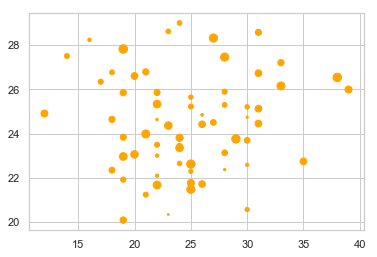

In [82]:
#plot data for Urban cities
x_axis_urban= count_rides_urban['ride_id']
y_axis_urban= avg_fare_urban['fare']
plt.scatter(x_axis_urban,y_axis_urban, color="orange",s=drivers_urban['driver_count'],alpha=1.0,
           label="Urban")

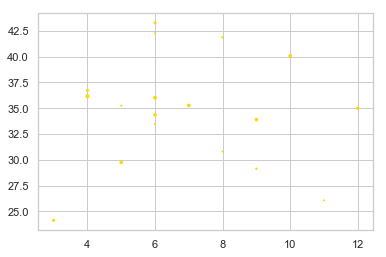

In [83]:
#plot data for Rural cities
x_axis_rural= count_rides_rural['ride_id']
y_axis_rural= avg_fare_rural['fare']
plt.scatter(x_axis_rural,y_axis_rural,color="gold", s=drivers_rural['driver_count'],alpha=1.0,
            label="Rural")

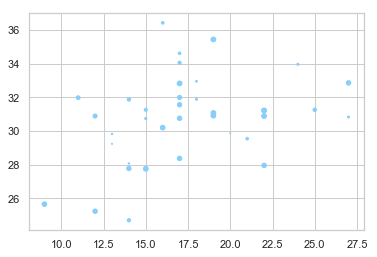

In [85]:
#plot data for Suburban cities
x_axis_suburban= count_rides_suburban['ride_id']
y_axis_suburban= avg_fare_suburban['fare']
plt.scatter(x_axis_suburban,y_axis_suburban,color="lightskyblue",s=drivers_suburban['driver_count'],
            alpha=1.0, label="Suburban")

In [88]:
#Creating Bubble Plot
urbanCities=pyBer_df[pyBer_df["type"]=="Urban"]
suburbanCities=pyBer_df[pyBer_df["type"]=="Suburban"]
ruralCities=pyBer_df[pyBer_df["type"]=="Rural"]

In [89]:
#use previous variables for averages and totals

urbanRideCount=urbanCities.groupby(["city"]).count()["ride_id"]
urbanFareAvg=urbanCities.groupby(["city"]).mean()["fare"]
urbanDriverCount=urbanCities.groupby(["city"]).mean()["driver_count"]

suburbanRideCount=suburbanCities.groupby(["city"]).count()["ride_id"]
suburbanFareAvg=suburbanCities.groupby(["city"]).mean()["fare"]
suburbanDriverCount=suburbanCities.groupby(["city"]).mean()["driver_count"]

ruralRideCount=ruralCities.groupby(["city"]).count()["ride_id"]
ruralFareAvg=ruralCities.groupby(["city"]).mean()["fare"]
ruralDriverCount=ruralCities.groupby(["city"]).mean()["driver_count"]

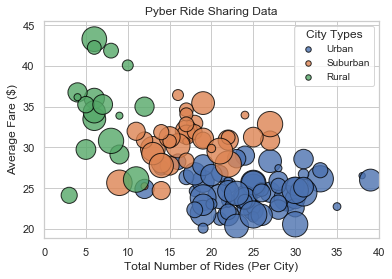

In [92]:
plt.scatter(urbanRideCount, 
            urbanFareAvg, 
            s=10*urbanDriverCount,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Urban")

plt.scatter(suburbanRideCount, 
            suburbanFareAvg, 
            s=10*urbanDriverCount,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Suburban")

plt.scatter(ruralRideCount, 
            ruralFareAvg, 
            s=10*urbanDriverCount,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Rural")

plt.title("Pyber Ride Sharing Data")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.xlim((0,40))
plt.grid(True)


lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.show()

## Total Fares by City Type

In [ ]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


In [98]:
#total fares from data
cities_and_rides=pd.merge(ride_data,city_data, on='city')
cities_and_rides.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [118]:
#total fares from data
total_fares=cities_and_rides["fare"].sum()

In [119]:
#percentage of total fares by city type
city_type=cities_and_rides.groupby('type')
total_fares_by_type=city_type.sum().reset_index()

In [120]:
#Rural calculation
total_fares_by_type
type_index=total_fares_by_type.set_index('type')
rural_fare=type_index.loc[["Rural"],["fare"]]
percentage_rural_fare=((rural_fare["fare"])/(total_fares)*100)
print(percentage_rural_fare)

type
Rural    6.811493
Name: fare, dtype: float64


In [121]:
#Urban calculation
urban_fare=type_index.loc[["Urban"],["fare"]]
percentage_urban_fare=((urban_fare["fare"])/(total_fares)*100)
print(percentage_urban_fare)

type
Urban    62.724635
Name: fare, dtype: float64


In [122]:
#Suburban Calculation
suburban_fare=type_index.loc[["Suburban"],["fare"]]
percentage_suburban_fare=((suburban_fare["fare"])/(total_fares)*100)
print(percentage_suburban_fare)

type
Suburban    30.463872
Name: fare, dtype: float64


In [123]:
#total rides from data
total_rides=cities_and_rides["ride_id"].count()

In [124]:
#percentage of total rides by city type
total_rides_by_type=city_type.count().reset_index()
type_index=total_rides_by_type.set_index('type')
rural_rides=type_index.loc[["Rural"],["ride_id"]]
percentage_rural_rides=((rural_rides["ride_id"])/(total_rides)*100)
print(percentage_rural_rides)

type
Rural    5.263158
Name: ride_id, dtype: float64


In [125]:
urban_rides=type_index.loc[["Urban"],["ride_id"]]
percentage_urban_rides=((urban_rides["ride_id"])/(total_rides)*100)
print(percentage_urban_rides)

type
Urban    68.421053
Name: ride_id, dtype: float64


In [126]:
suburban_rides=type_index.loc[["Suburban"],["ride_id"]]
percentage_suburban_rides=((suburban_rides["ride_id"])/(total_rides)*100)
print(percentage_suburban_rides)

type
Suburban    26.315789
Name: ride_id, dtype: float64


In [127]:
#total drivers from data
total_drivers=city_data["driver_count"].sum()

In [128]:
#percentage of total drivers by city type
city_type=city_data.groupby('type')
total_drivers_by_type=city_type.sum().reset_index()
type_index=total_drivers_by_type.set_index('type')
rural_drivers=type_index.loc[["Rural"],["driver_count"]]
percentage_rural_drivers=((rural_drivers["driver_count"])/(total_drivers)*100)
print(percentage_rural_drivers)

type
Rural    2.623613
Name: driver_count, dtype: float64


In [129]:
urban_drivers=type_index.loc[["Urban"],["driver_count"]]
percentage_urban_drivers=((urban_drivers["driver_count"])/(total_drivers)*100)
print(percentage_urban_drivers)

type
Urban    80.894719
Name: driver_count, dtype: float64


In [142]:
suburban_drivers=type_index.loc[["Suburban"],["driver_count"]]
percentage_suburban_drivers=((suburban_drivers["driver_count"])/(total_drivers)*100)
print(percentage_suburban_drivers)

type
Suburban    16.481668
Name: driver_count, dtype: float64


In [149]:
#pie charts
labels=["Rural","Urban","Suburban"]
sizes = [percentage_rural_fare,percentage_urban_fare,percentage_suburban_fare]

colors=["gold","lightcoral","lightskyblue"]
explode=(0,0.1,0)

Text(0.5, 1.0, '% of Total Fares by City Type')

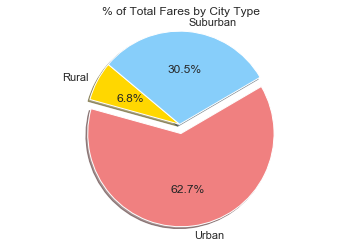

In [151]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Fares by City Type")

## Total Rides by City Type

In [154]:
labels=["Rural","Urban","Suburban"]
sizes = [percentage_rural_rides,percentage_urban_rides,percentage_suburban_rides]
colors=["gold","lightcoral","lightskyblue"]
explode=(0,0.1,0)

Text(0.5, 1.0, '% of Total Rides by City Type')

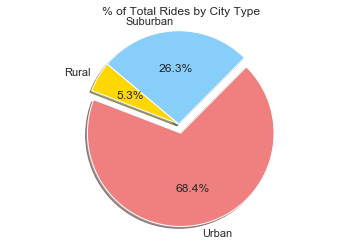

In [156]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Rides by City Type")

## Total Drivers by City Type

In [159]:
labels=["Rural","Urban","Suburban"]
sizes =[percentage_rural_drivers,percentage_urban_drivers,percentage_suburban_drivers]
colors=["gold","lightcoral","lightskyblue"]
explode=(0,0.1,0)

Text(0.5, 1.0, 'Percentage of Total Drivers by City Type')

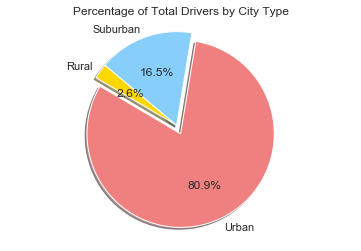

In [161]:
plt.pie(sizes,explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Percentage of Total Drivers by City Type")